In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set visual style
sns.set_style('whitegrid')

In [2]:
# Load the dataset
try:
    df = pd.read_csv('Housing.csv')
    print("✅ Data loaded successfully!")
    # Display the first 5 rows to check data
    display(df.head())
except FileNotFoundError:
    print("❌ Error: 'Housing.csv' not found.")

✅ Data loaded successfully!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


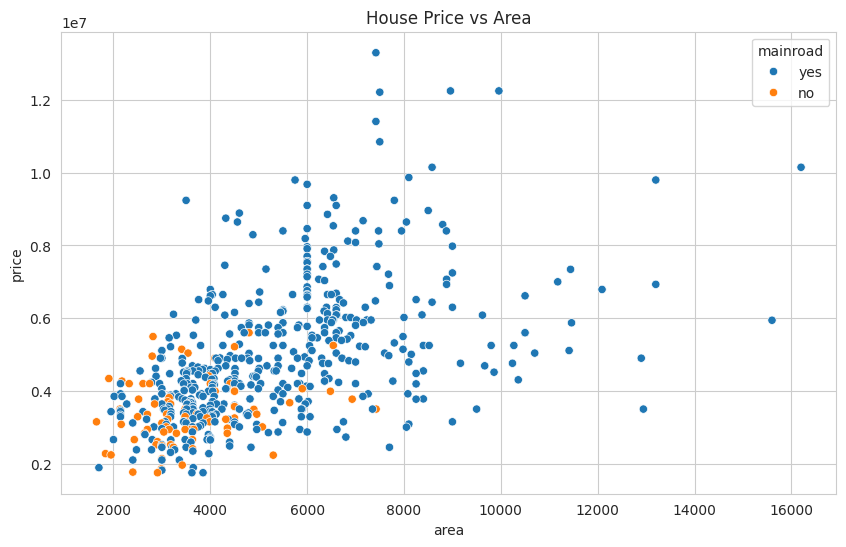

In [3]:
# Let's visualize the relationship between Area and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='mainroad')
plt.title('House Price vs Area')
plt.show()

In [4]:
# Map Yes/No to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

df[binary_cols] = df[binary_cols].apply(binary_map)

# One-Hot Encoding for 'furnishingstatus'
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, status], axis=1)
df.drop(['furnishingstatus'], axis=1, inplace=True)

# Check the processed dataframe
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [5]:
# Target (y) is price, Features (X) is everything else
y = df.pop('price')
X = df

# Split: 70% Training, 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Train model
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [6]:
# Make predictions
y_pred = lm.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mre = np.mean(np.abs((y_test - y_pred) / y_test))

# Print Report
print("="*30)
print("   MODEL PERFORMANCE REPORT   ")
print("="*30)
print(f"R² Score: {r2:.4f}")
print(f"MAE:      {mae:,.2f}")
print(f"MSE:      {mse:,.2f}")
print(f"RMSE:     {rmse:,.2f}")
print(f"MRE:      {mre:.2%}")
print("="*30)

   MODEL PERFORMANCE REPORT   
R² Score: 0.6730
MAE:      835,899.47
MSE:      1,283,969,782,447.75
RMSE:     1,133,123.90
MRE:      19.19%


In [7]:
# Show which features matter most
coeffs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeffs.sort_values(by='Coefficient', ascending=False).head(5)

,Coefficient
bathrooms,1.102004e+06
hotwaterheating,9.801708e+05
airconditioning,7.724748e+05
prefarea,6.863920e+05
mainroad,5.825986e+05
